In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
df = pd.read_csv("/content/drive/MyDrive/DL /Placement.csv")

In [3]:
df.shape

(215, 15)

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


<p><b>There is no need for column("sl_no") in our prediction so,we can remove it.</b></p>

In [5]:
df.drop(["sl_no"],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [7]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### EDA and Preprocessing.

In [8]:
df.fillna(0,inplace=True)

df["salary"].isnull().sum()


0

<p><b>Let's check whether the data-set is Balanced or not?</b></p>

In [9]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

<p><b>We can call it as slighlty Imbalanced.</b></p>

In [10]:
print("SSC Boards: ",df["ssc_b"].unique())
print("HSC Boards: ",df["hsc_b"].unique())

SSC Boards:  ['Others' 'Central']
HSC Boards:  ['Others' 'Central']


In [11]:
mean_ssc = df.groupby("gender")["ssc_p"].mean()
mean_ssc

gender
F    68.310921
M    66.752518
Name: ssc_p, dtype: float64

In [12]:
mean_hsc = df.groupby("gender")["hsc_p"].mean()
mean_hsc

gender
F    66.646842
M    66.161655
Name: hsc_p, dtype: float64

## Data Visualisation,

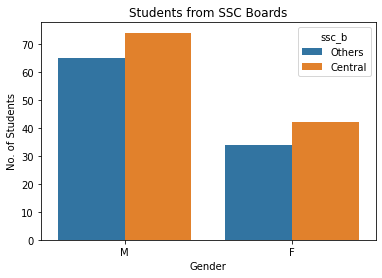

In [13]:
plt.figure()
sns.countplot(x="gender",hue="ssc_b",data=df)
plt.title("Students from SSC Boards")
plt.xlabel("Gender")
plt.ylabel("No. of Students")
plt.show()

<p><b>We can call it as slighlty Imbalanced.</b></p>

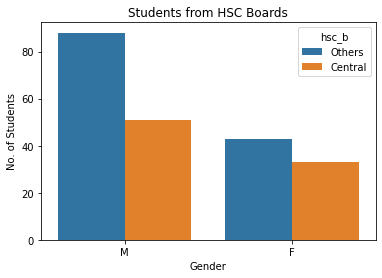

In [14]:
plt.figure()
sns.countplot(x="gender",hue="hsc_b",data=df)
plt.title("Students from HSC Boards")
plt.xlabel("Gender")
plt.ylabel("No. of Students")
plt.show()

In HSC there are state boards popular than Central board.

<p><b>Now, check which streams are popular among the students in Higher Education.</b></p>

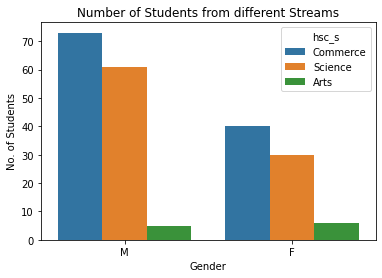

In [15]:
plt.figure()
sns.countplot(x="gender",hue="hsc_s",data=df)
plt.title("Number of Students from different Streams")
plt.xlabel("Gender")
plt.ylabel("No. of Students")
plt.show()

Most Students have preferred Commerce over Science as they likely to go in Marketing and Finance field.Whereas,Arts has least interest.

In [16]:
mean_degree = df.groupby("gender")["degree_p"].mean()

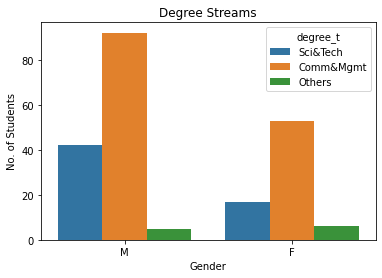

In [17]:
plt.figure()
sns.countplot(x="gender",hue="degree_t",data=df)
plt.title("Degree Streams")
plt.xlabel("Gender")
plt.ylabel("No. of Students")
plt.show()

As we see above graph that Commerce & Mgmt is the popular streams in all students, sci & tech comes second and all others streams shows less attractions among students.

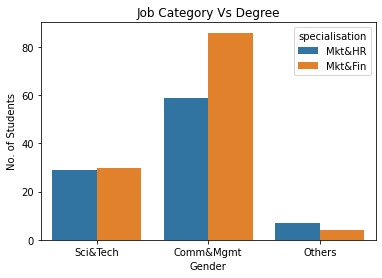

In [18]:
plt.figure()
sns.countplot(x="degree_t",hue="specialisation",data=df)
plt.title("Job Category Vs Degree")
plt.xlabel("Gender")
plt.ylabel("No. of Students")
plt.show()

<p><b>Now,let see which job market offers high annual income to candidate?</b></p>

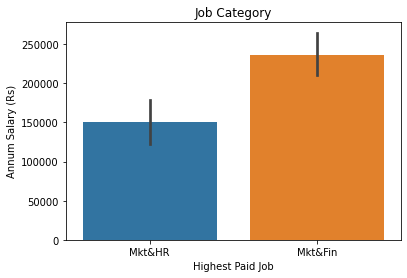

In [19]:
plt.figure()
sns.barplot(x="specialisation",y="salary",data=df)
plt.title("Job Category")
plt.ylabel("Annum Salary (Rs)")
plt.xlabel("Highest Paid Job")
plt.show()

Mrkt & Finance offers a good salary while Mrkt & HR gives decent money to candidate.

In [20]:
# categorical data
df_cat = df.select_dtypes("object")

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [23]:
df_cat.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,1,1,1,2,0,1,1
1,1,0,1,2,2,1,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,2,2,0,1,0
4,1,0,0,1,0,0,0,1


In [24]:

# Numerical columns
df_num = df.select_dtypes(["int64","float64"])

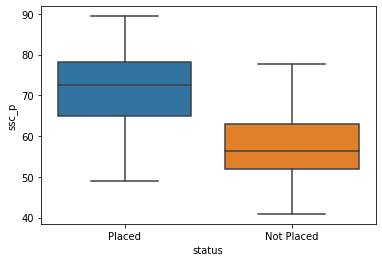

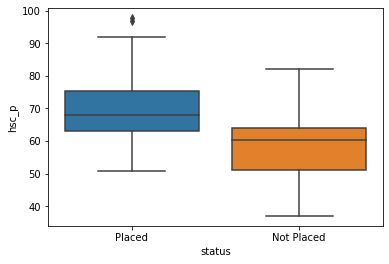

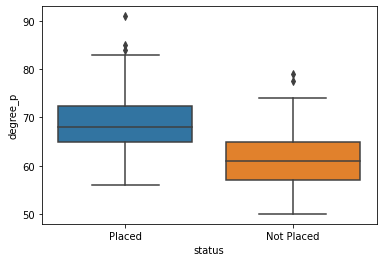

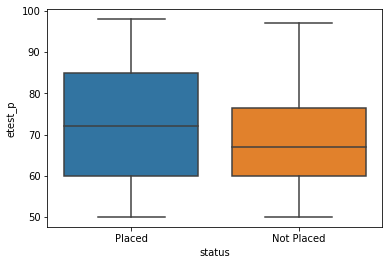

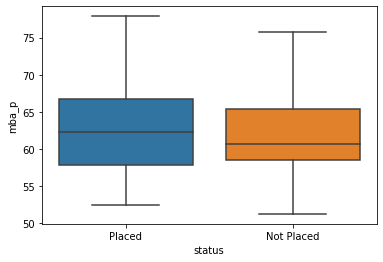

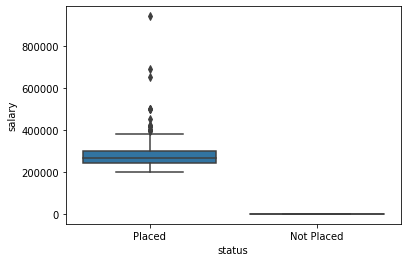

In [25]:
for col in df_num:
  plt.figure()
  sns.boxplot(data=df,y=col,x="status")
  plt.show()

In [26]:
from scipy.stats import skew

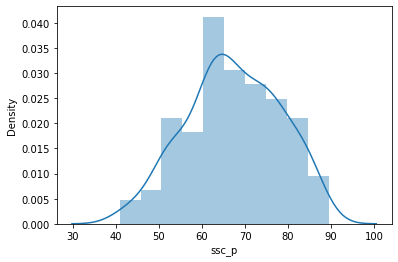

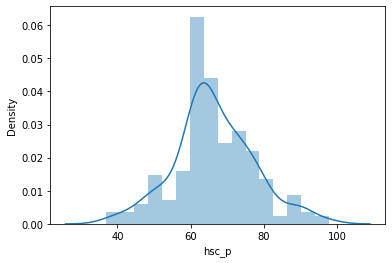

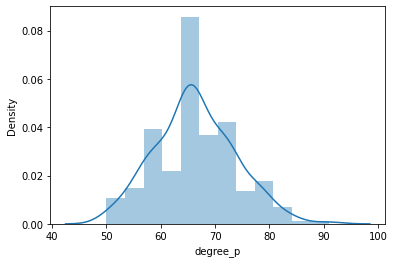

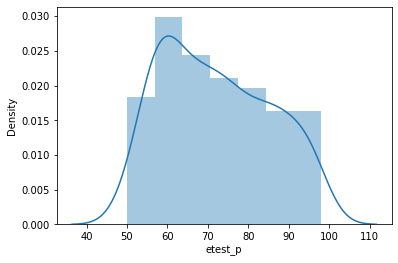

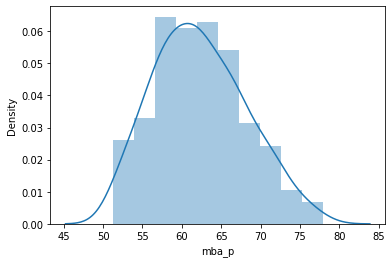

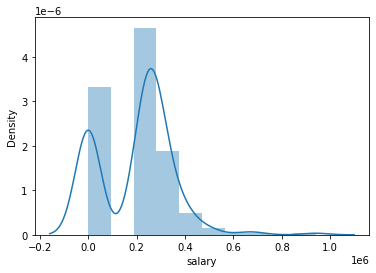

In [27]:
for col in df_num:
  
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

In [28]:
df_num.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [29]:
df_final = pd.concat([df_cat,df_num],axis=1)

In [30]:
df_final.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,1,1,1,2,0,1,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,1,0,1,2,2,1,0,1,79.33,78.33,77.48,86.5,66.28,200000.0
2,1,0,0,0,0,0,0,1,65.00,68.00,64.00,75.0,57.80,250000.0
3,1,0,0,2,2,0,1,0,56.00,52.00,52.00,66.0,59.43,0.0
4,1,0,0,1,0,0,0,1,85.80,73.60,73.30,96.8,55.50,425000.0


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_b           215 non-null    int64  
 2   hsc_b           215 non-null    int64  
 3   hsc_s           215 non-null    int64  
 4   degree_t        215 non-null    int64  
 5   workex          215 non-null    int64  
 6   specialisation  215 non-null    int64  
 7   status          215 non-null    int64  
 8   ssc_p           215 non-null    float64
 9   hsc_p           215 non-null    float64
 10  degree_p        215 non-null    float64
 11  etest_p         215 non-null    float64
 12  mba_p           215 non-null    float64
 13  salary          215 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 23.6 KB


In [32]:
# filter method - chi and anova
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [33]:
# Dropping unnecessary Columns from the Data.
df_final.drop(["gender","ssc_b","hsc_b","hsc_s","mba_p"],axis=1,inplace=True)
df_final.head()

,degree_t,workex,specialisation,status,ssc_p,hsc_p,degree_p,etest_p,salary
0,2,0,1,1,67.00,91.00,58.00,55.0,270000.0
1,2,1,0,1,79.33,78.33,77.48,86.5,200000.0
2,0,0,0,1,65.00,68.00,64.00,75.0,250000.0
3,2,0,1,0,56.00,52.00,52.00,66.0,0.0
4,0,0,0,1,85.80,73.60,73.30,96.8,425000.0


In [34]:
X = df_final.drop("status",axis=1)
y = df_final["status"]

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (150, 8)
X_test:  (65, 8)
y_train:  (150,)
y_test:  (65,)


In [37]:
anova_test = SelectKBest(score_func=f_regression,k=7)
X_train_anova = anova_test.fit_transform(X_train,y_train)
X_test_anova = anova_test.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_train_anova,y_train)
lin.score(X_test_anova,y_test)

0.8249608412439968

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_anova,y_train)
lr.score(X_test_anova,y_test)

1.0

In [40]:
# wrapper methods - forward selection

In [41]:
columns = []
for col in X:
    columns.append(col)
    
    X_new = df_final[columns]
    
    X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=1)
    
    lr = LogisticRegression()
    
    lr.fit(X_train,y_train)
    
    r2 = lr.score(X_test,y_test)
            
    print("cols: ",col,"  -  r2 score: ",r2)
    

cols:  degree_t   -  r2 score:  0.6923076923076923
cols:  workex   -  r2 score:  0.6923076923076923
cols:  specialisation   -  r2 score:  0.6923076923076923
cols:  ssc_p   -  r2 score:  0.7846153846153846
cols:  hsc_p   -  r2 score:  0.8307692307692308
cols:  degree_p   -  r2 score:  0.8307692307692308
cols:  etest_p   -  r2 score:  0.8307692307692308
cols:  salary   -  r2 score:  1.0


# Standardizing Data

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

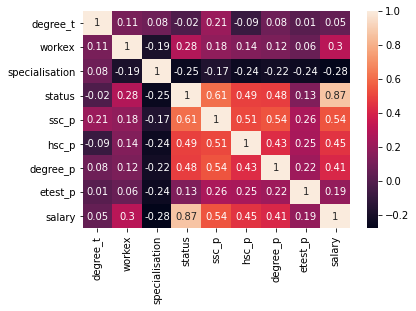

In [43]:
sns.heatmap(round(df_final.corr(),2),annot=True)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [45]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [46]:
# confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[20  0]
 [ 0 45]]


In [47]:
# f1_score
print(f1_score(y_test,y_pred))

1.0


In [48]:
dt = DecisionTreeClassifier(min_samples_split=0.8,max_features=1,)
dt.fit(X_train,y_train)
y1_pred = dt.predict(X_test)
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.83      0.96      0.89        45

    accuracy                           0.83        65
   macro avg       0.84      0.75      0.78        65
weighted avg       0.83      0.83      0.82        65



In [49]:
# confusion_matrix

print(confusion_matrix(y_test,y1_pred))

[[11  9]
 [ 2 43]]


In [50]:
# f1_score
print(f1_score(y_test,y1_pred))

0.88659793814433


In [51]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y2_pred = rf.predict(X_test)
print(classification_report(y_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [52]:
# confusion_matrix

print(confusion_matrix(y_test,y2_pred))

[[20  0]
 [ 0 45]]


In [53]:
# f1_score

print(f1_score(y_test,y2_pred))

1.0


Since we get good score with logistic regression and random forest, we also can try more models